In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
import process_images_hdf5 as pi5
import filters

In [ ]:
from skimage import io, color
from skimage.transform import rescale,resize,rotate
import glob
import os
from tqdm.notebook import tqdm

## Make the scale2 image set

In [ ]:
files=glob.glob('/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/*.jpg')
files.sort()
print( "Image files: %d" % len(files))

Image files: 118


In [ ]:
sz=1536, 2048

sz[0]/1536*600,sz[1]/1536*600

(600.0, 800.0)

In [ ]:
for i,fname in (pbar := tqdm(enumerate(files),total=len(files))):
    rgb = io.imread(fname)
    if i<10:
        print(fname,rgb.shape)
    else:
        print(".",end="")
        
print()



  0%|          | 0/118 [00:00<?, ?it/s]

/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1724_0454.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1724_0455.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1725_0456.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1725_0457.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1725_0458.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1726_0463.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1727_0465.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1727_0467.jpg (1200, 1600, 3)
/Users/bblais/python/work/natural_images/images/original/all_bbsk081604/p7212004_1727_0468.jpg (1200, 1600, 3)
/

In [ ]:
len(files)

118

In [ ]:
import filters
import process_images_hdf5 as pi5

In [ ]:
asdf_fname='asdf/bbsk081604_all_scale2.asdf'
max_pic=1000
overwrite=True

if overwrite or not os.path.exists(asdf_fname):

    print(asdf_fname)
    
    im=[]
    for i,fname in (pbar := tqdm(enumerate(files),total=len(files))):
        if i<max_pic:
            rgb = io.imread(fname)
            lab = color.rgb2lab(rgb)
            lab=resize(lab,(600,800), anti_aliasing=True)  # turns out not all of the bbsk images are the same size!
            #lab=rescale(lab, 1/2, anti_aliasing=True)
            L=lab[:,:,0]  # luminance
            im.append(L.astype(float))
        
    var_R={'im':im,'im_scale_shift':[1.0,0.0]}
    filters.set_resolution(var_R,'uint16')
    pi5.asdf_save_images(var_R,asdf_fname) 


asdf/bbsk081604_all_scale2.asdf


  0%|          | 0/118 [00:00<?, ?it/s]

Resolution float64 -> uint16


In [ ]:
asdf_fname='asdf/bbsk081604_all_scale2_rot8.asdf'
max_pic=1000
overwrite=True

if overwrite or not os.path.exists(asdf_fname):

    print(asdf_fname)
    
    im=[]
    for i,fname in (pbar := tqdm(enumerate(files),total=len(files))):

        for ang in [0,45,90,135,180,225,270,315]:        
            rgb = io.imread(fname)
            lab = color.rgb2lab(rgb)    
            lab = rotate(lab, 45,resize=False,mode='symmetric')
            lab=resize(lab,(600,800), anti_aliasing=True)  # turns out not all of the bbsk images are the same size!
            L=lab[:,:,0]  # luminance
            im.append(L.astype(float))

    var_R={'im':im,'im_scale_shift':[1.0,0.0]}
    filters.set_resolution(var_R,'uint16')
    pi5.asdf_save_images(var_R,asdf_fname) 



asdf/bbsk081604_all_scale2_rot8.asdf


  0%|          | 0/118 [00:00<?, ?it/s]

In [ ]:
asdf_fname='asdf/bbsk081604_all_scale1.asdf'
max_pic=1000
if not os.path.exists(asdf_fname):

    print(asdf_fname)
    
    im=[]
    for i,fname in (pbar := tqdm(enumerate(files),total=len(files))):
        if i<max_pic:
            rgb = io.imread(fname)
            lab = color.rgb2lab(rgb)
            lab=resize(lab,(1200,1600), anti_aliasing=True)  # turns out not all of the bbsk images are the same size!
            #lab=rescale(lab, 1/2, anti_aliasing=True)
            L=lab[:,:,0]  # luminance
            im.append(L.astype(float))
        
    var_R={'im':im,'im_scale_shift':[1.0,0.0]}
    filters.set_resolution(var_R,'uint16')
    pi5.asdf_save_images(var_R,asdf_fname) 


In [ ]:
base_image_file=asdf_fname='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


imfname=pi5.filtered_images(
                            base_image_file,
                            )


Base Image File: asdf/bbsk081604_all_scale2.asdf
Using cache_images/cache_images_3022abd002cdb9148ddc6391a446d321.asdf from cache.

Text(0.5, 0.98, 'cache_images/cache_images_3022abd002cdb9148ddc6391a446d321.asdf')

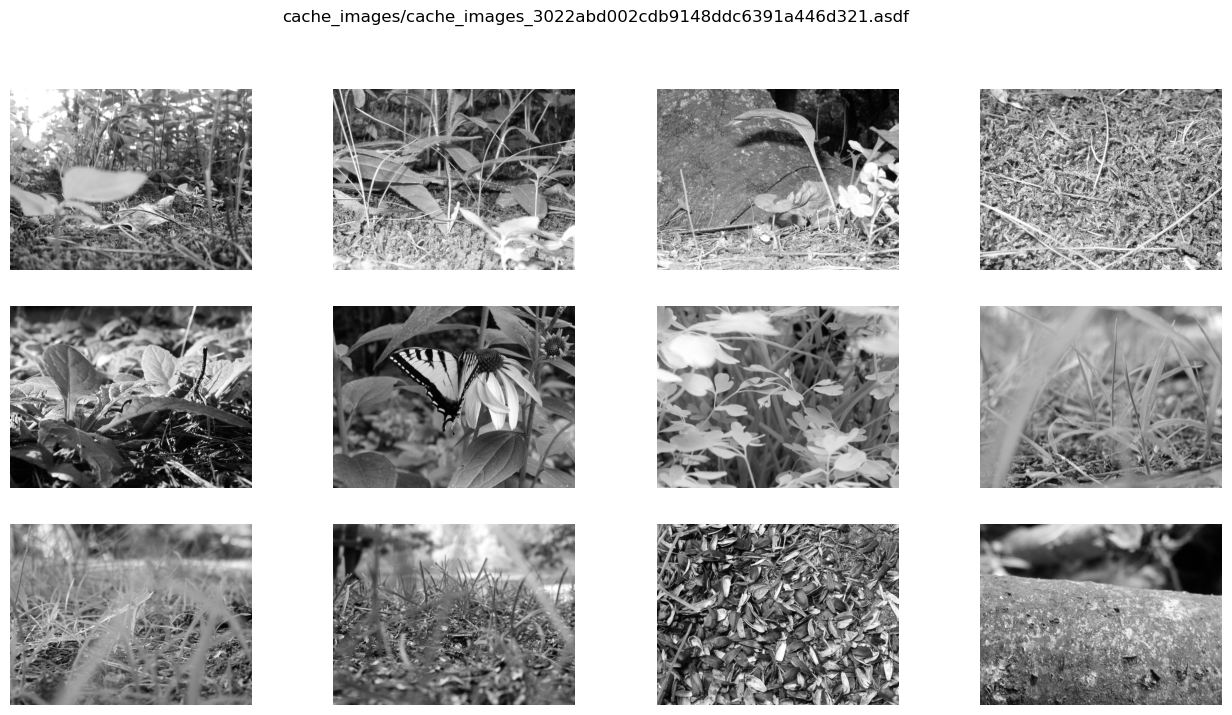

In [ ]:
image_data=pi5.asdf_load_images(imfname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]

del image_data
figure(figsize=(16,8))
for i in range(12):
    subplot(3,4,i+1)
    imshow(im[i],cmap=plt.cm.gray)
    axis('off')
    
suptitle(imfname)

In [ ]:
len(im)

118

In [ ]:
im[0].shape

(600, 800)

 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_8ce5228d97f8975d533187e0353a3249.asdf...Resolution float64 -> uint16
done.


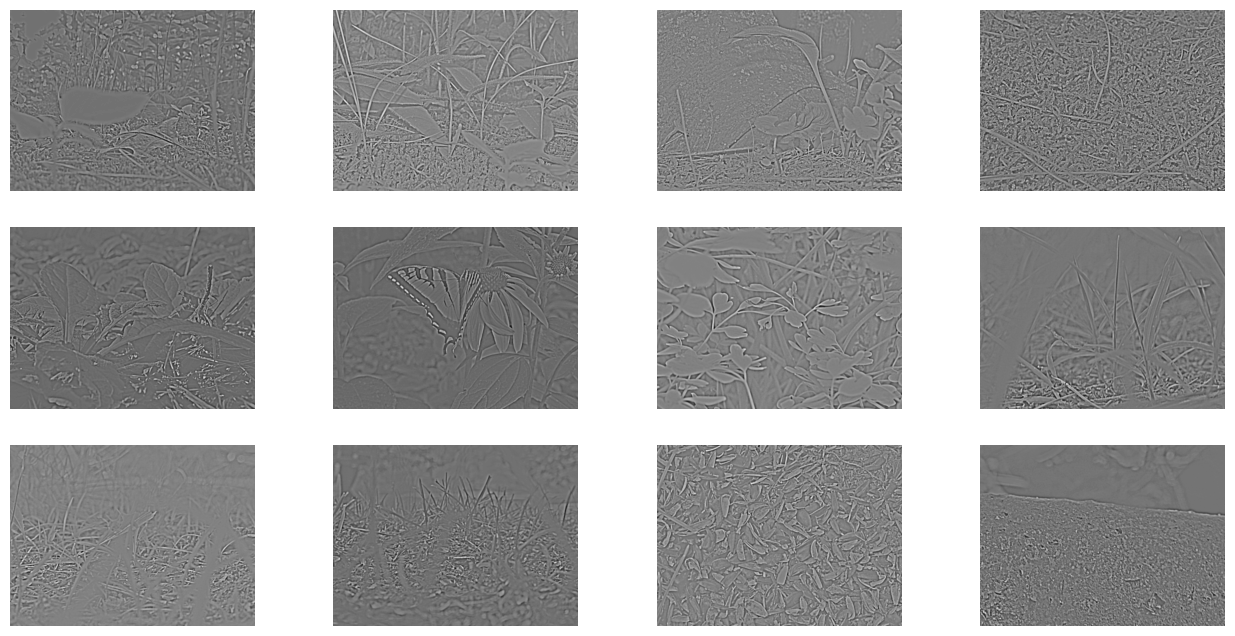

In [ ]:
base_image_file=asdf_fname
print("Base Image File:",base_image_file)


imfname=pi5.filtered_images(
                            base_image_file,
                            {'type':'dog','sd1',1,'sd2':3},
                            )

image_data=pi5.asdf_load_images(imfname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]

del image_data
figure(figsize=(16,8))
for i in range(12):
    subplot(3,4,i+1)
    imshow(im[i],cmap=plt.cm.gray)
    axis('off')

## questions

- is blur + dog same as dog+blur?